## Domain Analysis

### Project Context

This project uses the **Bank Marketing Dataset** from a Portuguese bank. The data was collected from direct marketing campaigns, conducted via phone calls, where the bank aimed to convince customers to **subscribe to a term deposit** — a fixed-term investment product with guaranteed interest.

Marketing campaigns are time-consuming and costly. Predictive modeling helps identify customers most likely to subscribe, enabling the bank to **target efforts more efficiently** and **maximize campaign success**.

---

### Objective

> Predict whether a customer will subscribe (`yes`) or not (`no`) to a term deposit, based on their personal, contact, and banking information.

The target variable is:
- **`y`**: Subscription outcome
  - `yes`: Customer subscribed
  - `no`: Customer did not subscribe

---

### Key Terms and Feature Descriptions

#### 1. Client Information
| Column       | Description                                             |
|--------------|---------------------------------------------------------|
| `age`        | Customer's age                                          |
| `job`        | Type of job (e.g., admin., technician, services, etc.) |
| `marital`    | Marital status (e.g., married, single, divorced)       |
| `education`  | Educational level                                       |
| `default`    | Has credit in default? (`yes`/`no`)                     |
| `housing`    | Has housing loan? (`yes`/`no`)                          |
| `loan`       | Has personal loan? (`yes`/`no`)                         |

#### 2. Contact Information
| Column         | Description                                           |
|----------------|-------------------------------------------------------|
| `contact`      | Contact communication type (`cellular`, `telephone`) |
| `month`        | Last contact month                                    |
| `day_of_week`  | Last contact day of the week                          |
| `duration`     | Last contact duration (in seconds) – caution: data leak risk |

#### 3. Campaign Performance
| Column     | Description                                                        |
|------------|--------------------------------------------------------------------|
| `campaign` | Number of contacts during the current campaign                     |
| `pdays`    | Days since last contact (-1 means client was never contacted)      |
| `previous` | Number of contacts before this campaign                            |
| `poutcome` | Outcome of the previous marketing campaign (`success`, `failure`)  |

#### 4. Economic Indicators
| Column           | Description                             |
|------------------|-----------------------------------------|
| `emp.var.rate`   | Employment variation rate               |
| `cons.price.idx` | Consumer price index                    |
| `cons.conf.idx`  | Consumer confidence index               |
| `euribor3m`      | Euribor 3-month interest rate           |
| `nr.employed`    | Number of employees (macro indicator)   |

---

### Target Variable

| Column | Description                                                  |
|--------|--------------------------------------------------------------|
| `y`    | Whether the client subscribed to a term deposit (`yes`/`no`) |

---

### Notes

- The dataset is **imbalanced**, with far more `no` responses than `yes`.
- The variable `duration` can lead to **data leakage** if not handled correctly, as longer calls often correlate with a positive response.


# Python Implementation

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Basic Checks

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [4]:
df = pd.read_csv('bank-full.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Exploratory Data Analysis (EDA)

In [6]:
df.shape, df.dtypes

((45211, 17),
 age           int64
 job          object
 marital      object
 education    object
 default      object
 balance       int64
 housing      object
 loan         object
 contact      object
 day           int64
 month        object
 duration      int64
 campaign      int64
 pdays         int64
 previous      int64
 poutcome     object
 y            object
 dtype: object)

In [7]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

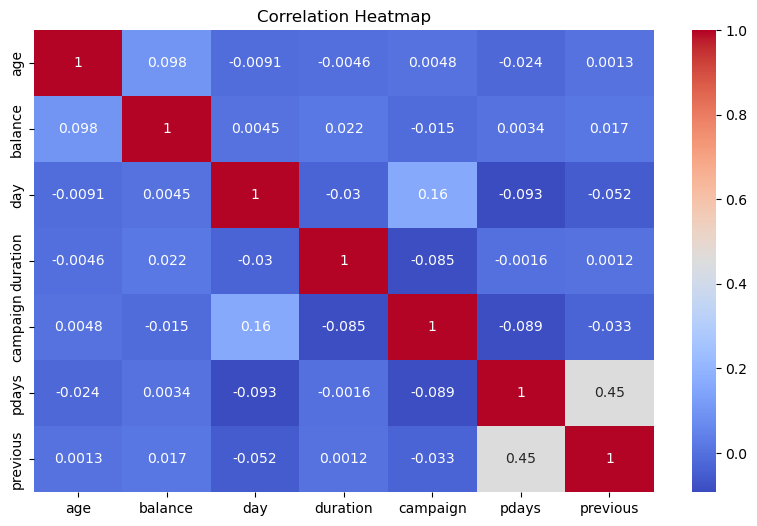

In [10]:
# Correlation heatmap (for numerical features)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

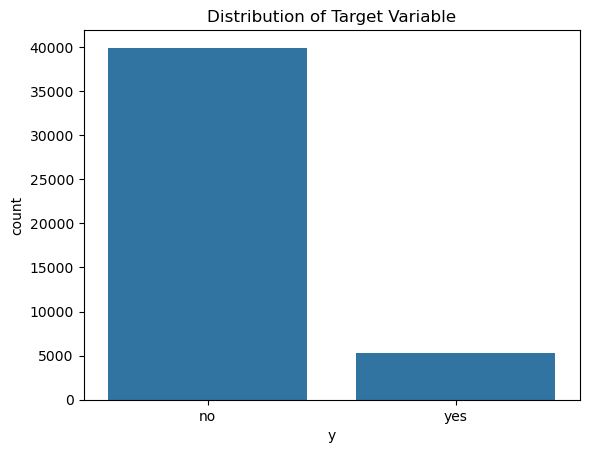

In [11]:
# Countplot of target variable
sns.countplot(x='y', data=df)
plt.title("Distribution of Target Variable")
plt.show()

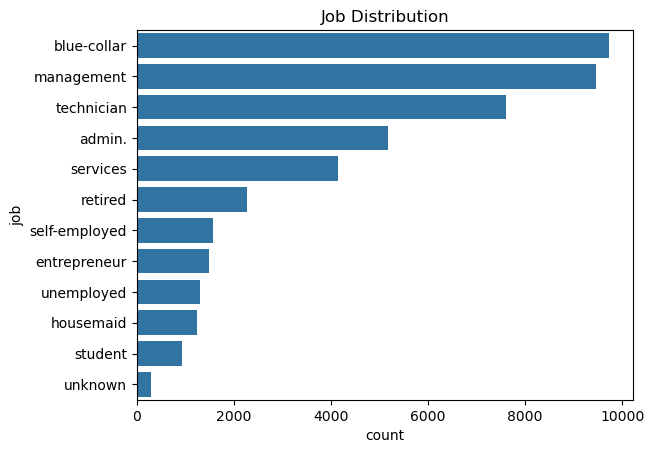

In [12]:
# Example: Plot job distribution
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title("Job Distribution")
plt.show()

In [13]:
for col in df.columns:
    print(f"{col} - 'unknown' count: {df[df[col] == 'unknown'].shape[0]}")

age - 'unknown' count: 0
job - 'unknown' count: 288
marital - 'unknown' count: 0
education - 'unknown' count: 1857
default - 'unknown' count: 0
balance - 'unknown' count: 0
housing - 'unknown' count: 0
loan - 'unknown' count: 0
contact - 'unknown' count: 13020
day - 'unknown' count: 0
month - 'unknown' count: 0
duration - 'unknown' count: 0
campaign - 'unknown' count: 0
pdays - 'unknown' count: 0
previous - 'unknown' count: 0
poutcome - 'unknown' count: 36959
y - 'unknown' count: 0


In [14]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [16]:
for col in df.columns:
    print(f"{col} - 'unknown' count: {df[df[col] == 'unknown'].shape[0]}")


age - 'unknown' count: 0
job - 'unknown' count: 288
marital - 'unknown' count: 0
education - 'unknown' count: 1857
default - 'unknown' count: 0
balance - 'unknown' count: 0
housing - 'unknown' count: 0
loan - 'unknown' count: 0
contact - 'unknown' count: 13020
day - 'unknown' count: 0
month - 'unknown' count: 0
duration - 'unknown' count: 0
campaign - 'unknown' count: 0
pdays - 'unknown' count: 0
previous - 'unknown' count: 0
poutcome - 'unknown' count: 36959
y - 'unknown' count: 0


In [17]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking how many "unknown" values are in the data

In [18]:
# Check how many "unknown" values are in the data
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: 'unknown' = {df[col].value_counts().get('unknown', 0)}")

job: 'unknown' = 288
marital: 'unknown' = 0
education: 'unknown' = 1857
contact: 'unknown' = 13020
month: 'unknown' = 0
poutcome: 'unknown' = 36959


### Convert "yes"/"no" to 1/0


In [19]:
# Convert "yes"/"no" to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,NaN,2143,NaN,NaN,unknown,5,may,261,1,-1,0,unknown,NaN
1,44,technician,single,secondary,NaN,29,NaN,NaN,unknown,5,may,151,1,-1,0,unknown,NaN
2,33,entrepreneur,married,secondary,NaN,2,NaN,NaN,unknown,5,may,76,1,-1,0,unknown,NaN
3,47,blue-collar,married,unknown,NaN,1506,NaN,NaN,unknown,5,may,92,1,-1,0,unknown,NaN
4,33,unknown,single,unknown,NaN,1,NaN,NaN,unknown,5,may,198,1,-1,0,unknown,NaN


In [21]:
df[['default', 'housing', 'loan', 'y']].head()

,default,housing,loan,y
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [22]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

In [23]:
df[['default', 'housing', 'loan', 'y']].head()


,default,housing,loan,y
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [24]:
print("default:", df['default'].unique())
print("housing:", df['housing'].unique())
print("loan:", df['loan'].unique())
print("y:", df['y'].unique())

default: [nan]
housing: [nan]
loan: [nan]
y: [nan]


In [25]:
# Step 1: Loading the dataset again (starting fresh)
df = pd.read_csv('bank-full.csv', sep=';')

# Step 2: Stripping the spaces and lowercase all text columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

# Step 3: Convert yes/no to 1/0 for relevant columns
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [26]:
df[['default', 'housing', 'loan', 'y']].head()



,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0


### Number of people said "yes" vs. "no"

In [27]:
#Number of people said "yes" vs. "no"
df['y'].value_counts()


y
0    39922
1     5289
Name: count, dtype: int64

### Percentage of people said "yes" vs. "no"


In [28]:
# Percentage of people said "yes" vs. "no"
df['y'].value_counts(normalize=True) * 100

y
0    88.30152
1    11.69848
Name: proportion, dtype: float64

### Charts


<Axes: title={'center': 'Term Deposit Subscription'}, ylabel='count'>

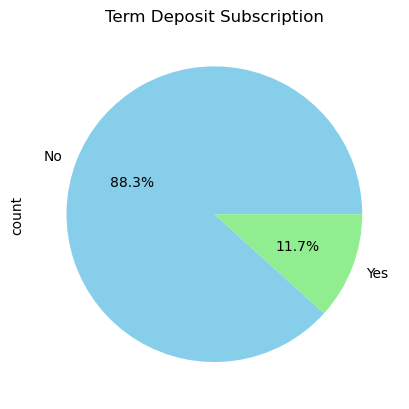

In [29]:
#Charts
df['y'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['skyblue', 'lightgreen'], title='Term Deposit Subscription')


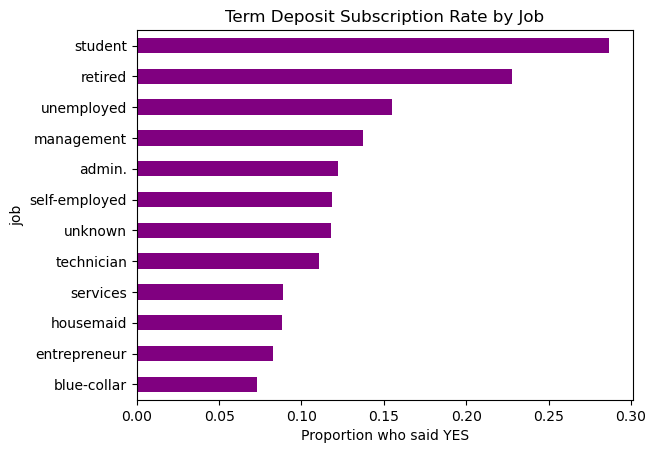

In [30]:
import matplotlib.pyplot as plt

df.groupby('job')['y'].mean().sort_values().plot(kind='barh', color='purple')
plt.xlabel('Proportion who said YES')
plt.title('Term Deposit Subscription Rate by Job')
plt.show()

## Building a Machine Learning Model

### Dropping columns we won't use for now

In [31]:
# Dropping columns we won't use for now
X = df.drop(columns=['y'])  # features
y = df['y']                 # target

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


### Converting text columns into numbers (One-Hot Encoding)

In [33]:
# Converting text columns into numbers (One-Hot Encoding)
# Text like "job", "marital", "education", etc., need to be turned into numbers using pd.get_dummies():

X = pd.get_dummies(X, drop_first=True)


In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


### Split the data into training and test sets

In [35]:
# Splitting the data into training and test sets
#We’ll split our data into:
# Training data: What the model learns from
#Test data: What we use to check if it learned well
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training a Logistic Regression Model

In [36]:
# Training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [37]:
#increasing the number of iterations
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

### Scaling the data

In [38]:
# Since that didn't work, scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test_scaled)


### Testing the model performance

In [40]:
# checking performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8988167643481145

Confusion Matrix:
 [[7755  197]
 [ 718  373]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



## Trying another Model

### Trying a Stronger Model: Random Forest

In [41]:
#Trying a Stronger Model: Random Forest which maybe can handle imbalance better and might capture more “yes” cases
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9050093995355524
[[7754  198]
 [ 661  430]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.68      0.39      0.50      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



### Important Features

<Axes: title={'center': 'Top 10 Important Features'}>

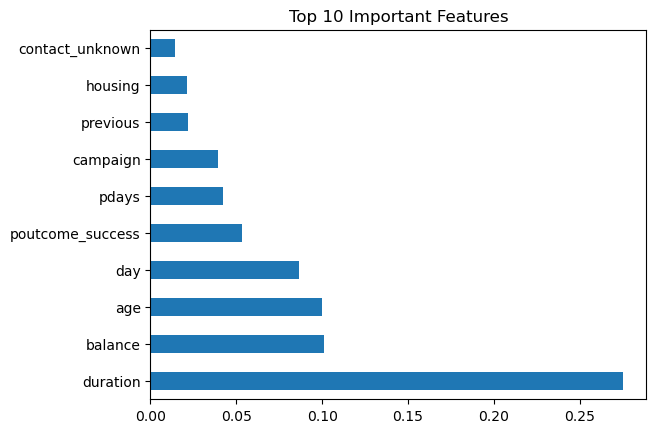

In [42]:
#Look at Important Features
#Let’s see what the model thinks matters most (for Random Forest)
import pandas as pd

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Important Features')


In [43]:
# Stronger Model — Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9050093995355524

Confusion Matrix:
 [[7754  198]
 [ 661  430]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.68      0.39      0.50      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



### Balanced data

In [44]:
#Balanced Random Forest (class_weight='balanced')
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

y_pred_balanced = rf_balanced.predict(X_test)

print("Balanced Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(confusion_matrix(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Balanced Accuracy: 0.9030189096538759
[[7803  149]
 [ 728  363]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7952
           1       0.71      0.33      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



### Using SMOTE

In [45]:
#Trying by SMOTE 
#Let’s balance the training data by creating synthetic “yes” samples using SMOTE:

#SMOTE-Based Random Forest:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)

y_pred_smote = rf_smote.predict(X_test)

print("SMOTE Accuracy:", accuracy_score(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


SMOTE Accuracy: 0.8988167643481145
[[7564  388]
 [ 527  564]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.59      0.52      0.55      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.73      0.75      9043
weighted avg       0.89      0.90      0.90      9043



In [46]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Visualization

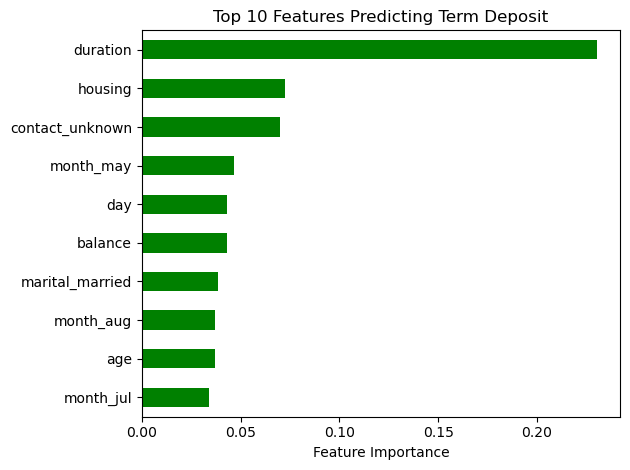

In [47]:
#Visuals for Report
#Top 10 Most Important Features
import pandas as pd
import matplotlib.pyplot as plt

features = pd.Series(rf_smote.feature_importances_, index=X.columns)
top_features = features.sort_values(ascending=False).head(10)

top_features.plot(kind='barh', color='green')
plt.title('Top 10 Features Predicting Term Deposit')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Confusion Matrix Heatmap

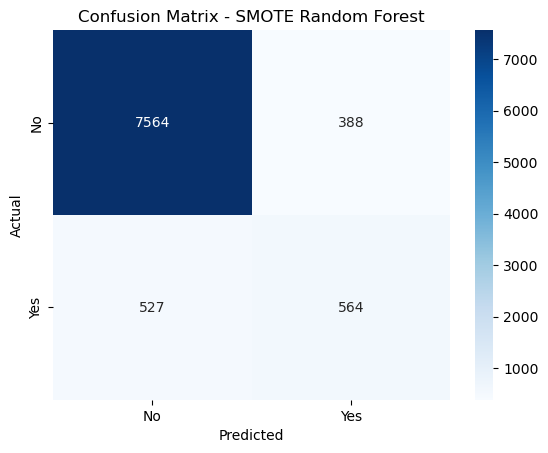

In [48]:
#Confusion Matrix Heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_smote)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SMOTE Random Forest')
plt.show()

## Trying with XGBoost

In [49]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


### XGBoost Code:

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train XGBoost on SMOTE-balanced data
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost with SMOTE Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost with SMOTE Accuracy: 0.894061705186332
[[7463  489]
 [ 469  622]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7952
           1       0.56      0.57      0.56      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.75      0.75      9043
weighted avg       0.89      0.89      0.89      9043



In [51]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [52]:
import lightgbm as lgb

# Train LightGBM on SMOTE-balanced data
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_sm, y_train_sm)

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 31970, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 63940, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy: 0.8974897710936636
[[7479  473]
 [ 454  637]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7952
           1       0.57      0.58      0.58      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.76      0.76      9043
weighted avg       0.90      0.90      0.90      9043



In [53]:
import joblib

# Save model
joblib.dump(lgb_model, 'lightgbm_model.pkl')

# To load it later:
# lgb_model = joblib.load('lightgbm_model.pkl')

['lightgbm_model.pkl']

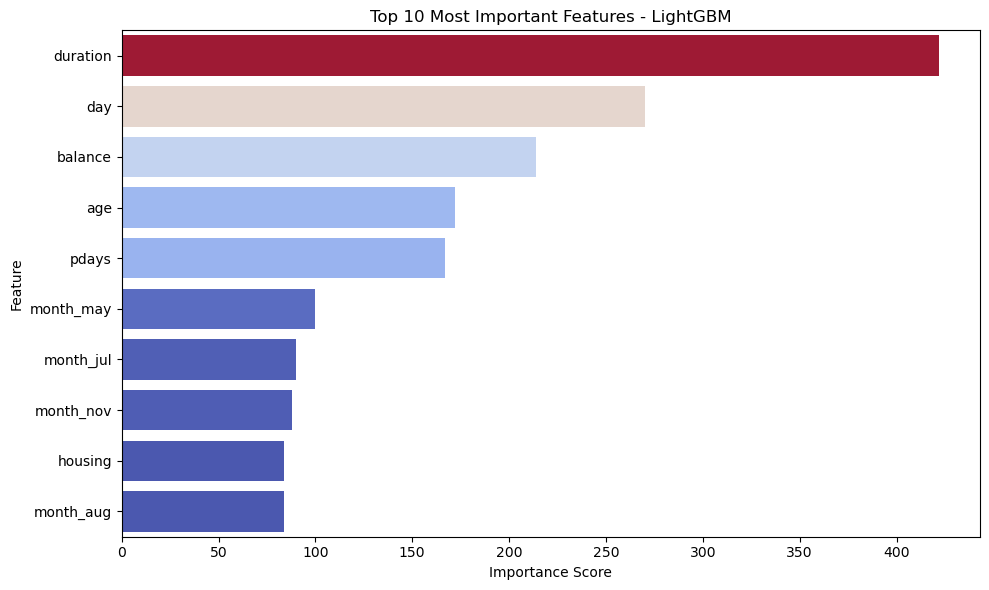

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
feature_importances = pd.Series(lgb_model.feature_importances_, index=X_train_sm.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
normed_values = (top_features.values - top_features.values.min()) / (top_features.values.max() - top_features.values.min())
colors = sns.color_palette("coolwarm", as_cmap=True)(normed_values)
sns.barplot(x=top_features.values, y=top_features.index, hue=top_features.index, palette=colors, legend=False)

#sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


plt.title('Top 10 Most Important Features - LightGBM')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



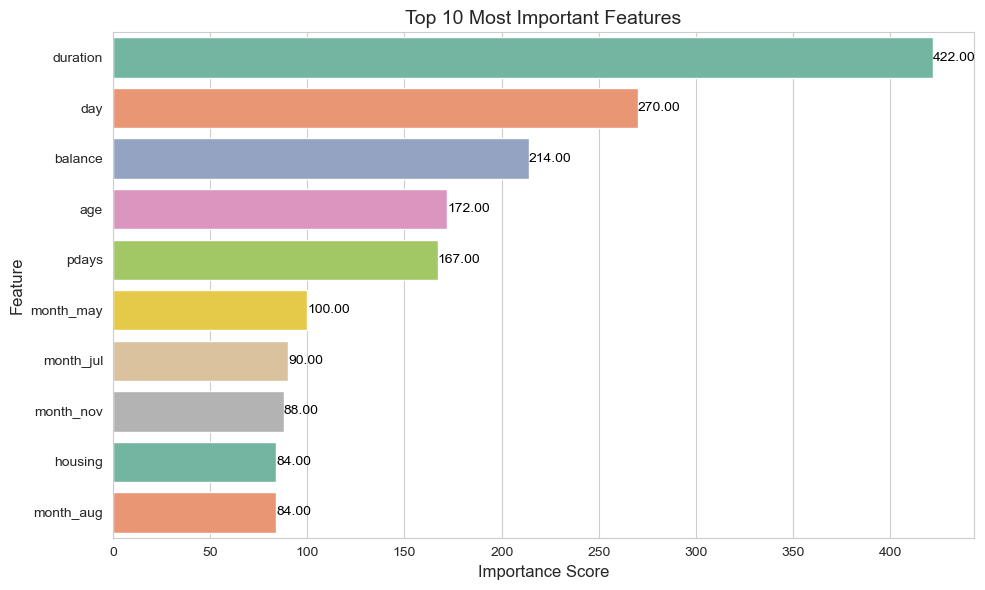

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data as a DataFrame with named columns
df_features = top_features.sort_values(ascending=False).head(10).reset_index()
df_features.columns = ['Feature', 'Importance']

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the barplot with hue and no legend
ax = sns.barplot(data=df_features, x='Importance', y='Feature', hue='Feature',
                 dodge=False, palette="Set2", legend=False)

# Add value labels
for i, v in enumerate(df_features['Importance']):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

# Set titles and labels
plt.title("Top 10 Most Important Features", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


## Conclusion

In this project, we analyzed a Portuguese bank's telemarketing dataset to predict whether a customer would subscribe to a term deposit. The dataset was imbalanced, with far fewer "yes" responses compared to "no".

We handled the class imbalance using SMOTE (Synthetic Minority Over-sampling Technique), and tested three powerful classification models:
- Random Forest
- XGBoost
- LightGBM

After comparing performance metrics (accuracy, recall, precision, F1-score), **LightGBM emerged as the best model**, achieving:
- **Accuracy**: 89.7%
- **Recall (yes)**: 58%
- **F1-score (yes)**: 58%
- **Lowest false negatives** among all models

These results indicate that LightGBM is the most effective model for this problem, especially in correctly identifying customers likely to subscribe — a key priority in direct marketing campaigns.


## Recommendations

1. **Adopt LightGBM** for future term deposit marketing predictions.
2. Focus on the **top 10 most important features** identified by the model to optimize marketing strategies.
3. Use the model to **score new customers** and prioritize outreach based on predicted likelihood to subscribe.
4. Periodically retrain the model with updated data to maintain accuracy and relevance.


In [56]:
# Save the Best Model (LightGBM)
import joblib
joblib.dump(lgb_model, 'lightgbm_model.pkl')


['lightgbm_model.pkl']

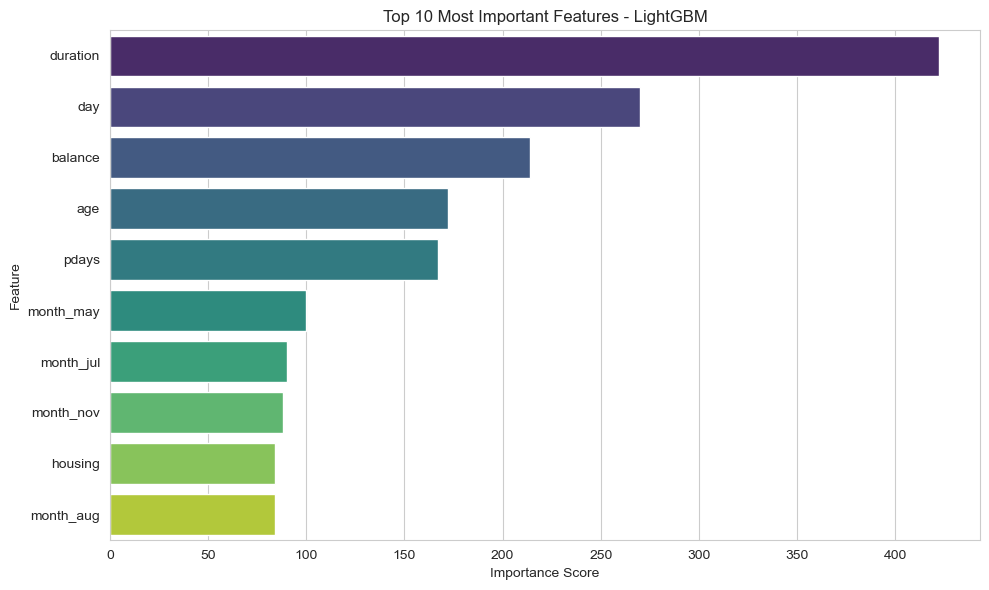

In [57]:
#Plot Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Series of feature importances
feature_importances = pd.Series(lgb_model.feature_importances_, index=X_train_sm.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

# Plot without warning
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, hue=top_features.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Most Important Features - LightGBM')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
